# Hazard: Bush Fire

This class is used to model the bushfire hazard using the historical data available and creating probabilistic events for each historical event. 

The historical data used comes from the [Fire Information for Resource Management System (FIRMS)](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/about-firms). They collect temperatures from the following satellite instruments:

    - Moderate Resolution Imaging Spectroradiometer  (MODIS): Near real time or standard quality data with 1 km resolution. Data available from November 2000 to present.

    - Visible Infrared Imaging Radiometer Suite (VIIRS): Near real time data with 0.375 km resolution. Data available from 20 January 2012 to present.

We recommand not to mix the two datasets and to use first the VIIRS data when available (as their resolution is higher). However the `Bushfire` class can deal with the two different datasets in terms of resolution and data cleaning. 

The data should be obtained at https://firms.modaps.eosdis.nasa.gov/download/ and saved as .csv file. Approximatly 15 min after submitting the request, the data can be downloaded by checking the request status. 

The `BushFire` class inherits from the `Hazard` class and has an associated hazard type `BF`. It provides a `set_hist_events()` method which enables to fill the hazard with historical events and a `set_proba_events()`  which generates random events for each historical event previously set. `hull_burned_area()` can be used to approximate the burned area of an event. It approximates a concave hull containing all the burned centroids and computes its area in hectares.

## HISTORICAL EVENTS

With `set_hist_events()` we can model the fires of the state of California in 2016.

An event is defined when the temporal and spatial distance of the burning centroids is close enough. There are two attributes of the class which define the "closeness":

    - days_thres (int): temporal distance in days. Default: 2.
    - clus_thres (int): factor to multiply to the centroids resolution. Used to determine the cluster maximum distance between two centroids. Default: 15.
    
In addition to the `Hazard` attibutes, `BushFire` contains a `date_end` attribute which contains the ending date of each event.

2019-10-29 21:51:37,869 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf
2019-10-29 21:51:39,461 - climada.hazard.bush_fire - INFO - Setting up historical events.
2019-10-29 21:51:39,617 - climada.hazard.centroids.centr - INFO - Setting geometry points.
2019-10-29 21:52:10,294 - climada.hazard.bush_fire - INFO - Remaining events to identify: 14688.
2019-10-29 21:52:12,852 - climada.hazard.bush_fire - INFO - Remaining events to identify: 118.
2019-10-29 21:52:13,051 - climada.hazard.bush_fire - INFO - Remaining events to identify: 0.
2019-10-29 21:52:13,053 - climada.hazard.bush_fire - INFO - Computing intensity of 1152 events.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


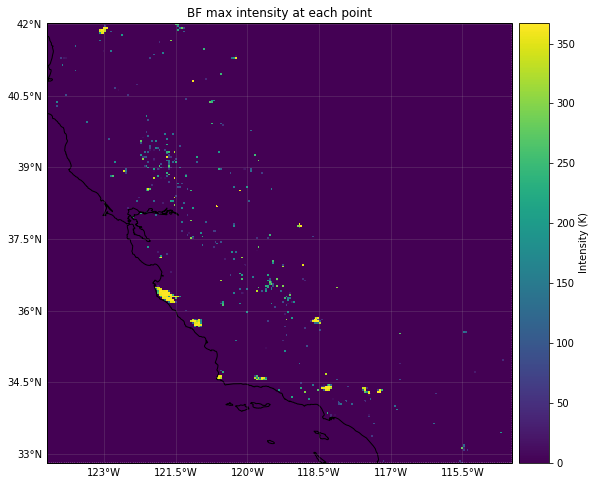

In [1]:
# Fires in California 2016
%matplotlib inline
import os

from climada.util import DATA_DIR
from climada.hazard import BushFire

# Data downloaded for VIIRS
CAL_FIRMS = os.path.join(DATA_DIR, "demo/California_firms_2016_viirs.csv")

# using 1/4 of the VIIRS resolution (1.5 km)
bf_cal = BushFire()
bf_cal.set_hist_events(CAL_FIRMS, centr_res_factor=1/4)

# plot the maximum intensity of all the events at each centroid
bf_cal.plot_intensity(event=0)

Let us focus on the Soberanes fire.

A given set of points or grid can be provided using the `Centroids` class. The events will be interpolated to the provided coordinates. 

2019-10-29 21:53:11,395 - climada.hazard.bush_fire - INFO - Setting up historical events.
2019-10-29 21:53:12,346 - climada.hazard.bush_fire - INFO - Remaining events to identify: 14688.
2019-10-29 21:53:15,105 - climada.hazard.bush_fire - INFO - Remaining events to identify: 118.
2019-10-29 21:53:15,354 - climada.hazard.bush_fire - INFO - Remaining events to identify: 0.
2019-10-29 21:53:15,356 - climada.hazard.bush_fire - INFO - Computing intensity of 1152 events.

 Event id with positive intensity in the burned region of Soberanes is  635


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


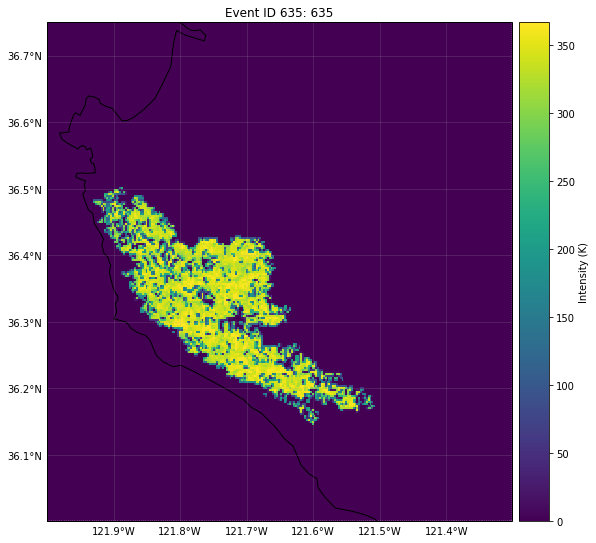

In [2]:
import numpy as np

from climada.hazard import Centroids
from climada.util.constants import ONE_LAT_KM

# focus on Soberanes region with 0.375 km resolution
res = 0.375/ONE_LAT_KM
centr_sob = Centroids()
centr_sob.set_raster_from_pnt_bounds((-122, 36, -121.3, 36.75), res)

bf_zoom = BushFire()
bf_zoom.set_hist_events(CAL_FIRMS, centroids=centr_sob)

# select the fire that started July 22
bf_sob = bf_zoom.select(date=('2016-07-22', '2016-07-22'))
# select unique event with positive intensity of bf_sob
uni_inten = np.unique(np.argwhere(bf_sob.intensity>0)[0,:])[0]
print('\n Event id with positive intensity in the burned region of Soberanes is ', str(bf_sob.event_id[uni_inten]))

bf_sob.plot_intensity(bf_sob.event_id[uni_inten])

2019-10-29 21:53:27,809 - climada.hazard.bush_fire - INFO - area: 50207.07145450957 ha
Burned area of Soberanes: 50207.07145450957  ha.
Ending time of fire: 2016-09-12


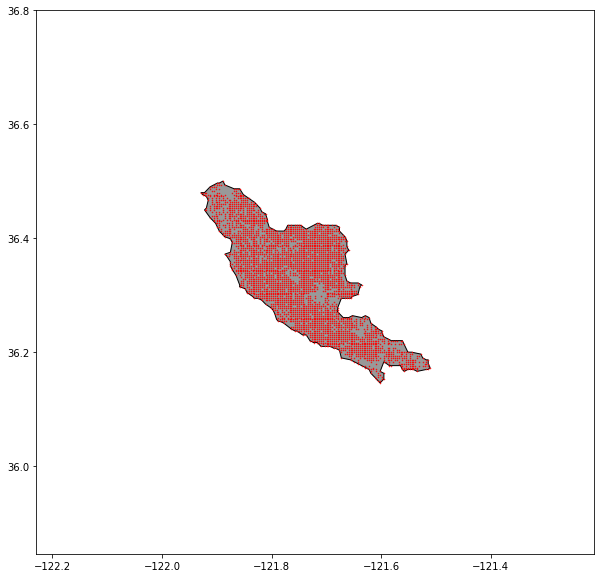

In [3]:
from climada.util.dates_times import date_to_str
print('Burned area of Soberanes:', bf_sob.hull_burned_area(bf_sob.event_id[uni_inten]), ' ha.')
print('Ending time of fire:', date_to_str(bf_sob.date_end[uni_inten]))

According to [Wikipedia](https://en.wikipedia.org/wiki/Soberanes_Fire), the fire ended October 12 and burned 53 470 ha. If we increase the temporal space between events to 3 days, the modelled Soberanes fire increases as follows:

2019-10-29 21:53:27,981 - climada.hazard.bush_fire - INFO - Setting up historical events.
2019-10-29 21:53:28,913 - climada.hazard.bush_fire - INFO - Remaining events to identify: 14592.
2019-10-29 21:53:30,814 - climada.hazard.bush_fire - INFO - Remaining events to identify: 16.
2019-10-29 21:53:30,932 - climada.hazard.bush_fire - INFO - Remaining events to identify: 0.
2019-10-29 21:53:30,934 - climada.hazard.bush_fire - INFO - Computing intensity of 969 events.

 Event id with positive intensity in the burned region of Soberanes is  564


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


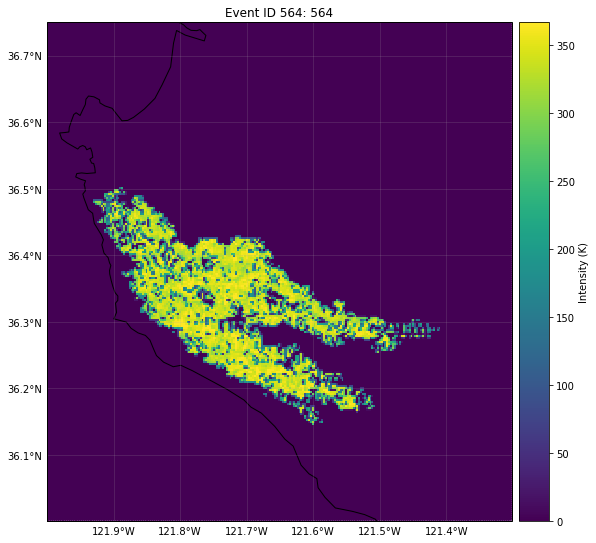

In [4]:
BushFire.days_thres = 3 # change class attribute

bf_zoom = BushFire()
bf_zoom.set_hist_events(CAL_FIRMS, centroids=centr_sob)

# select the fire that started July 22
bf_sob = bf_zoom.select(date=('2016-07-22', '2016-07-22'))
# select unique event with positive intensity of bf_sob
uni_inten = np.unique(np.argwhere(bf_sob.intensity>0)[0,:])[0]
print('\n Event id with positive intensity in the burned region of Soberanes is ', str(bf_sob.event_id[uni_inten]))

bf_sob.plot_intensity(bf_sob.event_id[uni_inten])

BushFire.days_thres = 2 # reset class attribute to default value

2019-10-29 21:53:41,518 - climada.hazard.bush_fire - INFO - area: 61285.418914616224 ha
Burned area of Soberanes: 61285.418914616224  ha.
Ending time of fire: 2016-09-30


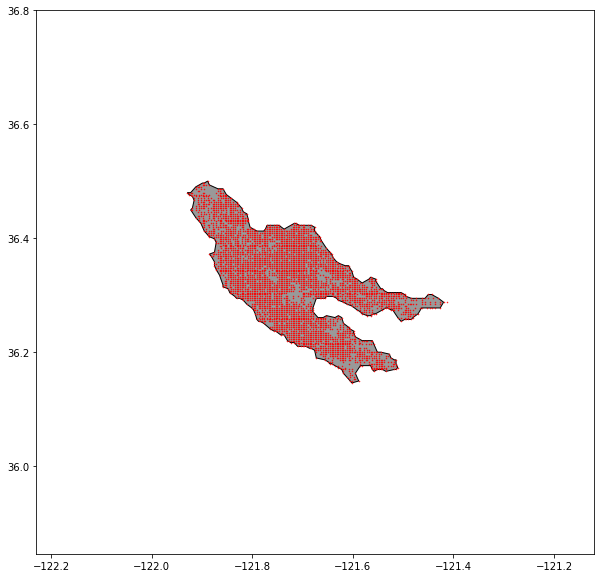

In [5]:
print('Burned area of Soberanes:', bf_sob.hull_burned_area(bf_sob.event_id[uni_inten]), ' ha.')
print('Ending time of fire:', date_to_str(bf_sob.date_end[uni_inten]))

## PROBABILISTIC EVENTS

`set_proba_events()` generates for each event in `BushFire` an ensamble of size `ens_size` of probabilistic events. These are generated by selecting randomly a centroid as ignition starting point. The fire is then propagated from the ignition point as a cellular automat following these rules:
    1. an empty centroid becomes a burning centroid with a probability PROP_PROBA if any of its eight neighbouring cells are burning
    2. an already burning centroid becomes an ember centroid (do not propagate fire anymore but still increases the damage)
    3. an ember centroid stays an ember centroid
  
The propagation stops when the burned area is equal or bigger than the burned area of the given historical event. The temperature provided to each centroid is randomly chosen from the corresponding historical event.

In [6]:
# generate 2 probabilistic events for each fire in California in 2016
bf_cal.set_proba_events(ens_size=2)

2019-10-29 21:53:41,720 - climada.hazard.bush_fire - INFO - Setting up probabilistic events.


/Users/aznarsig/Documents/Python/climada_python/climada/util/plot.py:318: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


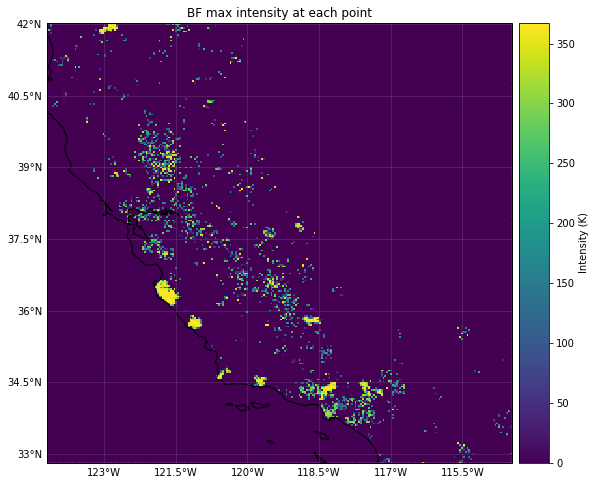

In [7]:
bf_cal.plot_intensity(0)

## Multiprocessing - improving performance for big computations

Multiprocessing is implemented in the bush fires. When dealing with a big amount of data, you might consider using it as follows:

In [ ]:
# execute these lines in a console, outside Jupyter Notebook
import os
from pathos.pools import ProcessPool as Pool

from climada.hazard import BushFire
from climada.util import DATA_DIR

# Data downloaded for VIIRS
CAL_FIRMS = os.path.join(DATA_DIR, "demo/California_firms_2016_viirs.csv")

ncpus=4
pool = Pool(ncpus)
bf_pool = BushFire(pool)
bf_pool.set_hist_events(CAL_FIRMS) # default resolution factor 1 -> 0.375 km resolution
bf_pool.set_proba_events(ens_size=2)
bf_pool.plot_intensity(0)

pool.close()
pool.join()